In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('files/breast_cancer.csv')

In [3]:
i = 0
for diag in df['diagnosis'].unique():
    df['diagnosis'].replace(diag, i, inplace=True)
    i += 1

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In [6]:
print(df['diagnosis'].unique())

[0 1]


In [7]:
print(len(df[df['diagnosis'] == 0]))
print(len(df[df['diagnosis'] == 1]))

212
357


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
print(df.columns)
bad_cols = ['id', 'Unnamed: 32', 'diagnosis']
train_cols = []
result_col = 'diagnosis'
for col in df.columns:
    if col not in bad_cols:
        train_cols.append(col)
print(train_cols)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal

In [11]:
x = df.loc[:, train_cols]
y = df[result_col]
print(len(x), len(y))

569 569


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2, shuffle=True)
print(len(x_train), len(y_train), len(x_test), len(y_test))

455 455 114 114


In [13]:
snn = KNeighborsClassifier(n_neighbors=5)
snn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_pred = snn.predict(x_test)
print(sum(y_pred - y_test))

0


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lin_reg = LinearRegression(copy_X=True, normalize=True)
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [33]:
y_pred = lin_reg.predict(x_test)
y_pred = np.round(y_pred)
def round_predict(y):
    if y < 0:
        return 0
    return np.round(y)
# print(y_pred)
for i in range(len(y_pred)):
    y_pred[i] = round_predict(y_pred[i])
y_test = [t for t in y_test]
# print(y_test)
# print(y_pred)
all_count = len(y_test)
good_count = 0
bad_predict = []
for i in range(all_count):
    if y_test[i] == y_pred[i]:
        good_count += 1
    else:
        bad_predict.append([y_test[i], y_pred[i]])
acc = good_count / all_count
print('all_count:', all_count)
print('accurancy:', acc)
if len(bad_predict) > 0:
    print('bad_predict:')
    for pred in bad_predict:
        print('test:', pred[0], '->', 'predicted:', pred[1])

all_count: 114
accurancy: 0.9736842105263158
bad_predict:
test: 0 -> predicted: 1.0
test: 0 -> predicted: 1.0
test: 0 -> predicted: 1.0


30
114 114


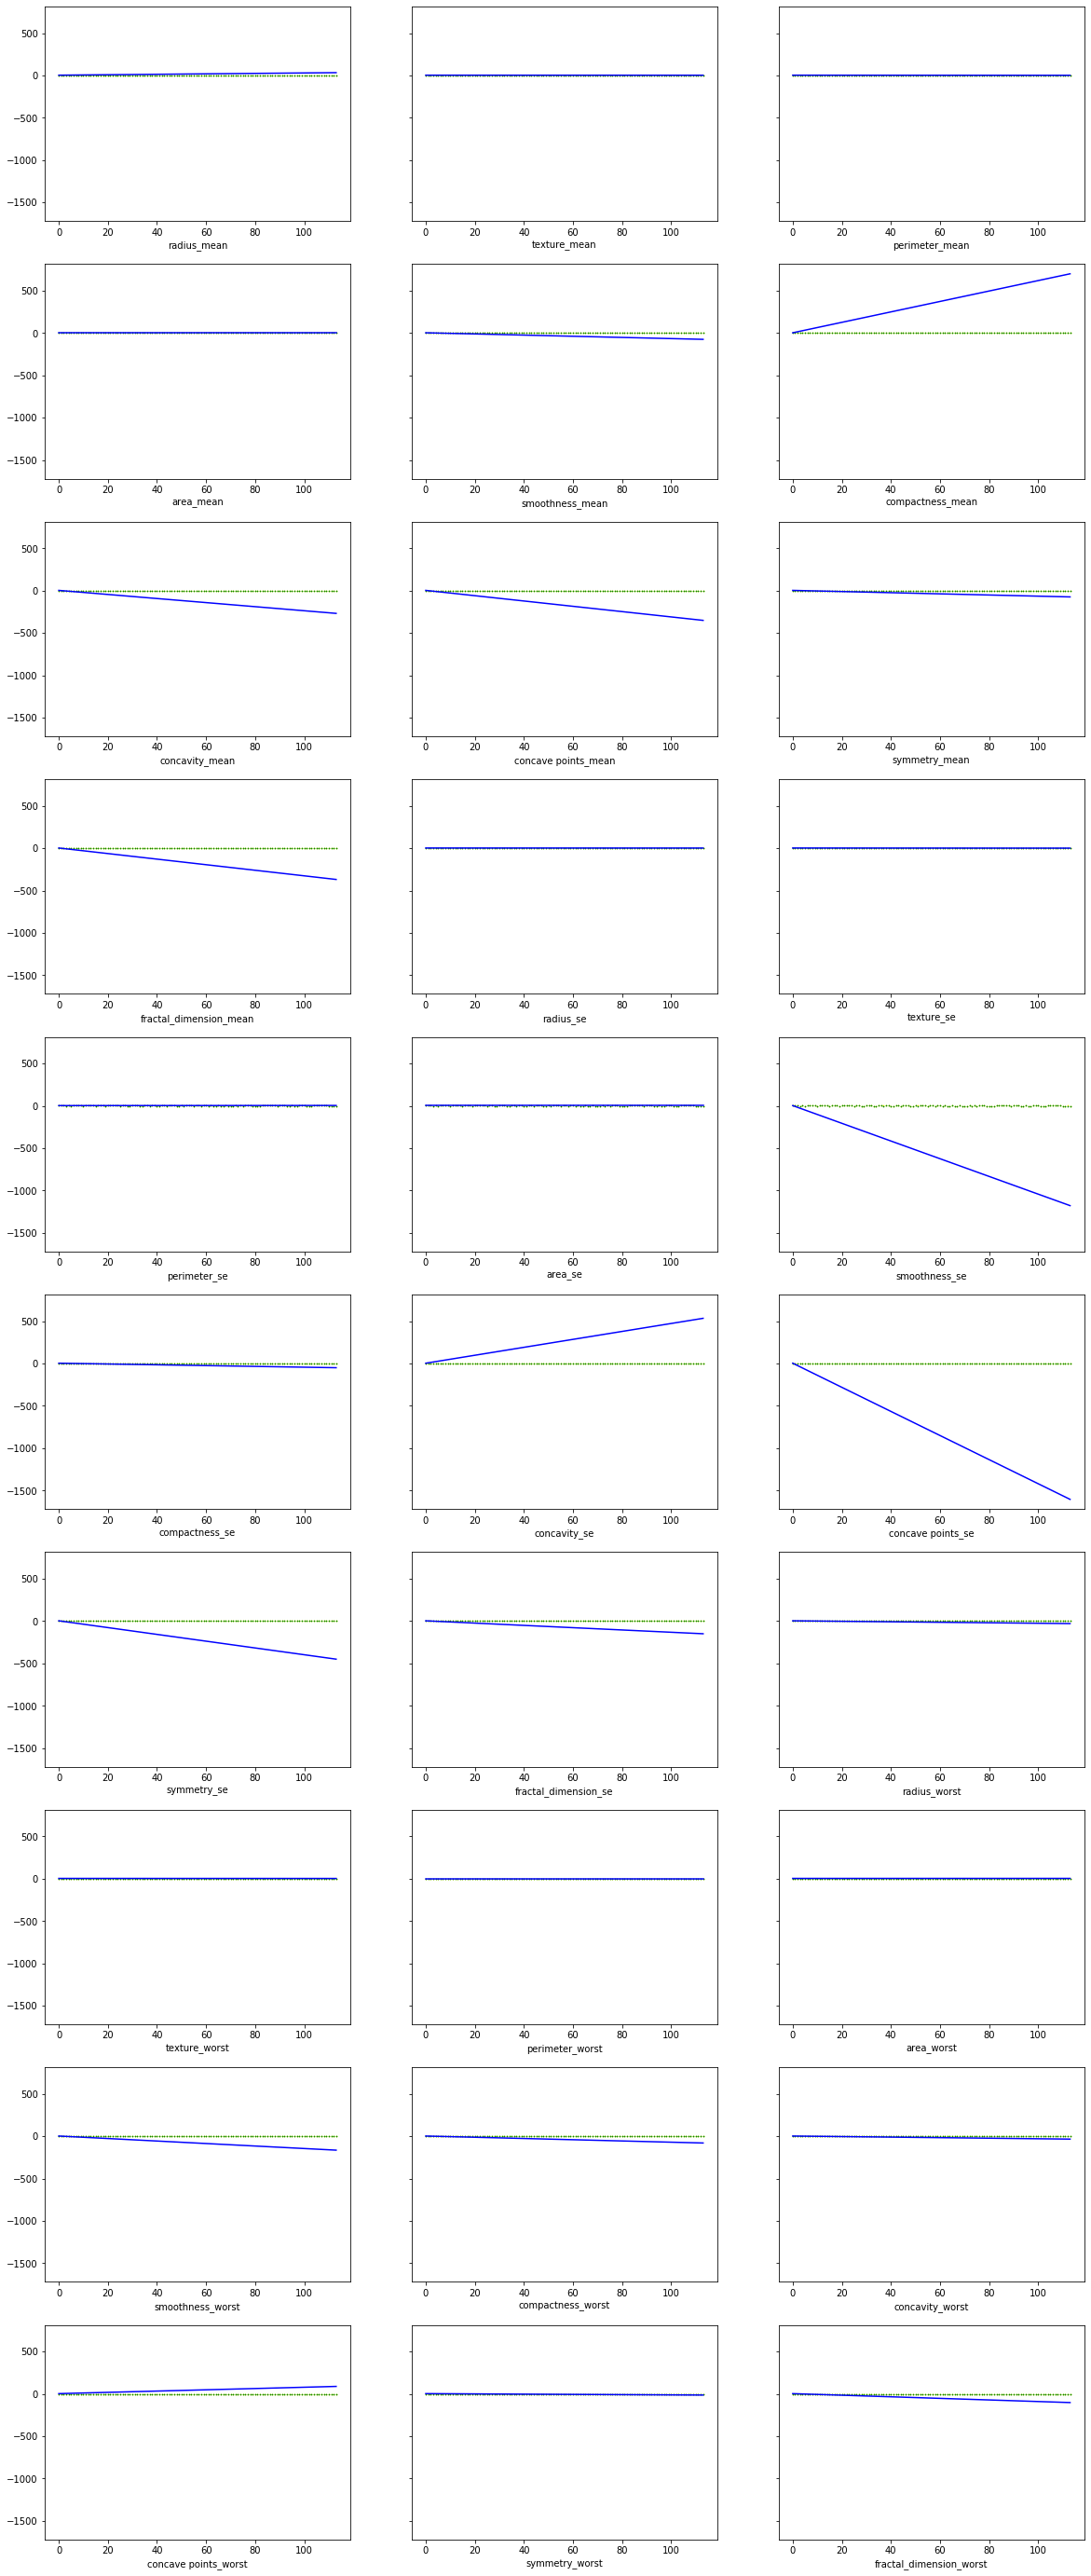

In [31]:
cur_col = 0
cur_row = 0
col_count = 3
row_count = len(train_cols) // col_count
print(len(train_cols))
print(len(y_pred), len(y_test))
fig, axes = plt.subplots(nrows=row_count, ncols=col_count, sharey=True, figsize=(20,50))
inter = lin_reg.intercept_
x = [i for i in range(len(y_pred))]
for i in range(len(train_cols)):
    coef = lin_reg.coef_[i]
    y = [coef * x + inter for x in x]
    axes[cur_row][cur_col].plot(x, y, 'blue')
    axes[cur_row][cur_col].scatter(x, y_pred, c='yellow', s=0.5)
    axes[cur_row][cur_col].scatter(x, y_test, c='green', s=0.5)
    axes[cur_row][cur_col].set_xlabel(train_cols[i])
    cur_col += 1
    if cur_col == col_count:
        cur_col = 0
        cur_row += 1
plt.show()